<div class="alert-info">
<font color='blue'>
<h1 align="center">
Part 1

In [1]:
library(pacman)
p_load(readxl, fBasics, tidyverse, ltm, ggmirt, ggsankey, apaTables,plot3D,writexl, FSA, DandEFA,rempsyc,
       factoextra, dendextend, magick, animation,installr)
library(pacman)
pacman::p_load(dplyr, tidyr, forcats, ggplot2, ggpubr, seminr, jtools,randomForest,tree, gbm, ISLR, metan,MASS,writexl,
               repr, psych, psy, polycor, Gifi, eRm, MPsychoR, mice, performance, MVN, gtheory,lavaan,
               corrplot, ggstance,rstatix, haven, magrittr, lessR, gridExtra, cowplot, ggsci, likert, finalfit,semTools)

In [2]:
Kurtosis <- function(x)kurtosis(x)[1]

In [3]:
Alila <- read_excel('GBOV_NO_ALILA.xlsx')
Alila <- as.data.frame(unclass(Alila), stringsAsFactors = T)
names(Alila)  

[1] "ID"                "Sex"               "Age"              
  [4] "Education_Level"   "Marital_Status"    "Employment_Status"
  [7] "Monthly_Income"    "SME_01"            "SME_02_Facebook"  
 [10] "SME_02_Instagram"  "SME_02_Twitter"    "SME_02_TikTok"    
 [13] "SME_02_Youtube"    "SME_02_Snapchat"   "SME_02_WhatsApp"  
 [16] "SME_02_Telegram"   "SME_03_Facebook"   "SME_03_Instagram" 
 [19] "SME_03_Twitter"    "SME_03_TikTok"     "SME_03_Youtube"   
 [22] "SME_03_Snapchat"   "SME_03_WhatsApp"   "SME_03_Telegram"  
 [25] "SME_04"            "SME_05"            "SME_06"           
 [28] "SME_07"            "SME_08"            "SME_09"           
 [31] "SU_01"             "SU_02"             "SU_03"            
 [34] "SU_04"             "SU_05"             "CU_06"            
 [37] "CU_07"             "CU_08"             "CU_09"            
 [40] "CU_10"             "HU_11"             "HU_12"            
 [43] "HU_13"             "HU_14"             "Ext_1"            
 [46] "Agr_1_R"           "Con_1"             "Neu_1"            
 [49] "Ope_1"             "Ext_2_R"           "Agr_2"            
 [52] "Con_2_R"           "Neu_2_R"           "Ope_2"            
 [55] "Ext_3"             "Agr_3_R"           "Con_3"            
 [58] "Neu_3"             "Ope_3"             "Ext_4"            
 [61] "Agr_4"             "Con_4_R"           "Neu_4"            
 [64] "Ope_4"             "Ext_5_R"           "Agr_5"            
 [67] "Con_5_R"           "Neu_5_R"           "Ope_5"            
 [70] "Ext_6"             "Agr_6_R"           "Con_6"            
 [73] "Neu_6"             "Ope_6"             "Ext_7_R"          
 [76] "Agr_7"             "Con_7"             "Neu_7_R"          
 [79] "Ope_7_R"           "Ext_8"             "Agr_8_R"          
 [82] "Con_8"             "Neu_8"             "Ope_8"            
 [85] "Ope_9_R"           "Agr_9"             "Con_9_R"          
 [88] "Ope_10"            "GBOV"              "QOL_01"           
 [91] "QOL_02"            "QOL_03"            "QOL_04"           
 [94] "QOL_05"            "QOL_06"            "QOL_07"           
 [97] "QOL_08"            "QOL_09"            "QOL_10"           
[100] "QOL_11"            "QOL_12"            "QOL_13"           
[103] "QOL_14"            "QOL_15"            "QOL_16"

# 1. The Variables

## 1.1. BFI

In [4]:
BFI <- Alila[, grep('Ext|Agr|Con|Neu|Ope', names(Alila))]

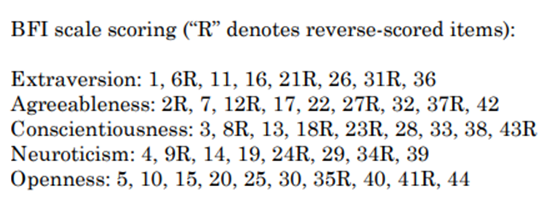

In [5]:
rev_scoring <- grep('_R', names(BFI))
rev_scoring
BFI[, rev_scoring] %>% head

[1]  2  6  8  9 12 18 21 23 24 27 31 34 35 37 41 43

,Agr_1_R,Ext_2_R,Con_2_R,Neu_2_R,Agr_3_R,Con_4_R,Ext_5_R,Con_5_R,Neu_5_R,Agr_6_R,Ext_7_R,Neu_7_R,Ope_7_R,Agr_8_R,Ope_9_R,Con_9_R
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,5,5,1,1,2,4,5,5,3,5,3,2,2,2
2,2,3,5,4,1,5,4,3,2,5,4,3,5,1,4,4
3,2,3,1,3,2,3,3,3,3,2,1,3,1,2,3,3
4,1,4,4,4,1,4,5,3,4,4,6,4,4,1,3,3
5,2,4,6,6,1,3,4,1,3,4,4,3,6,1,6,3
6,1,4,6,4,4,4,2,3,3,5,4,5,5,6,4,4


In [6]:
BFI[, rev_scoring] <- sapply( rev_scoring, function(x) 7 - BFI[, x])
BFI[, rev_scoring]  %>% head

,Agr_1_R,Ext_2_R,Con_2_R,Neu_2_R,Agr_3_R,Con_4_R,Ext_5_R,Con_5_R,Neu_5_R,Agr_6_R,Ext_7_R,Neu_7_R,Ope_7_R,Agr_8_R,Ope_9_R,Con_9_R
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,5,2,2,6,6,5,3,2,2,4,2,4,5,5,5
2,5,4,2,3,6,2,3,4,5,2,3,4,2,6,3,3
3,5,4,6,4,5,4,4,4,4,5,6,4,6,5,4,4
4,6,3,3,3,6,3,2,4,3,3,1,3,3,6,4,4
5,5,3,1,1,6,4,3,6,4,3,3,4,1,6,1,4
6,6,3,1,3,3,3,5,4,4,2,3,2,2,1,3,3


## 1.2. SME

In [7]:
SME <- Alila[, grep('SME', names(Alila))]
SME <- SME[, 19:23]
SME  %>% head

,SME_05,SME_06,SME_07,SME_08,SME_09
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,3,3,4,4
2,4,4,5,5,4
3,4,1,3,5,4
4,3,2,2,4,3
5,5,1,5,5,3
6,4,3,5,5,3


## 1.3. SMC

In [8]:
SMC <- Alila[, grep('CU|SU|HU', names(Alila))]
SMC  %>% head

,SU_01,SU_02,SU_03,SU_04,SU_05,CU_06,CU_07,CU_08,CU_09,CU_10,HU_11,HU_12,HU_13,HU_14
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,5,6,5,5,5,5,5,6,5,6,5,6,6
2,4,4,5,4,5,6,4,4,5,5,6,6,6,6
3,3,3,1,1,3,1,3,2,3,1,1,1,1,1
4,2,5,5,3,3,5,5,5,5,5,5,5,5,5
5,6,3,6,6,6,6,3,6,4,6,6,6,6,6
6,4,4,5,4,4,5,5,5,5,5,6,6,6,6


## 2. Descriptive Statistics

## 2.1. BFI

# 2.1.1 Desctiprive 

In [9]:
BFI <- BFI[, order(names(BFI))]

indikator <- c('Agr','Con', 'Ext', 'Neu', 'Ope')
X_var <- BFI
k <- sapply(1:5, function(x){
    data <- X_var[, grep(indikator[x], names(X_var))]   %>% unlist 
    data.frame(Mean=data  %>% mean  , 
               SD = data  %>% sd,
              Skewness = data  %>% skewness,
              Kurtosis = data  %>% Kurtosis ) 
    
})  
k <- as.data.frame(k)
names(k)<-indikator
k

,Agr,Con,Ext,Neu,Ope
,<named list>,<named list>,<named list>,<named list>,<named list>
Mean,4.335893,3.994368,3.90841,3.324885,4.189401
SD,1.320095,1.313731,1.34066,1.373853,1.305935
Skewness,-0.6374174,-0.3500503,-0.2961422,0.1587656,-0.5167744
Kurtosis,-0.2927836,-0.6284818,-0.7211092,-0.8050903,-0.4180324


In [10]:
indikator <- c('Agr','Con', 'Ext', 'Neu', 'Ope')
X_var <- BFI
options(repr.plot.width =8, repr.plot.height = 6, repr.plot.res = 350)
par(mfrow = c(2,3))

sapply(1:5, function(x) alpha(X_var[, grep(indikator[x], names(X_var)), drop=FALSE])[1])

Some items ( Agr_6_R ) were negatively correlated with the total scale and 
probably should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' optionSome items ( Ope_7_R ) were negatively correlated with the total scale and 
probably should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option

,raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,0.6031809,0.6227383,0.6655083,0.1549835,1.65068,0.04049668,4.335893,0.5576547,0.1209198
,raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,0.7430653,0.7511965,0.7966806,0.2512004,3.019236,0.02631023,3.994368,0.6537869,0.2668945
,raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,0.7933273,0.7959055,0.8251513,0.3277137,3.899692,0.02097348,3.90841,0.7936059,0.3527311
,raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [11]:
bfi_sums <- sapply(1:5, function(x) X_var[, grep(indikator[x], names(X_var)), drop=FALSE]  %>% rowSums )  %>% data.frame
names(bfi_sums) <- indikator
bfi_sums  %>% tail()

,Agr,Con,Ext,Neu,Ope
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
212,33,36,31,35,34
213,40,33,20,30,44
214,34,28,23,29,33
215,34,38,30,32,33
216,42,36,39,29,46
217,37,36,38,18,42


## 2.1.2 Clustering

## 2.2 SME

In [12]:
SME  %>% describe

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SME_05,1,217,3.861751,0.8273466,4,3.862857,1.4826,2,5,3,-0.03340578,-0.9867480,0.05616395
SME_06,2,217,2.391705,0.7381943,2,2.411429,1.4826,1,5,4,0.20209521,0.1331155,0.05011190
SME_07,3,217,3.534562,1.1586846,4,3.605714,1.4826,1,5,4,-0.43903489,-0.7348361,0.07865663
SME_08,4,217,4.562212,0.9164397,5,4.788571,0.0000,1,5,4,-2.12269480,3.6479804,0.06221198
SME_09,5,217,3.451613,0.7127864,3,3.468571,1.4826,1,5,4,-0.36483098,0.9002780,0.04838710


# 2.3 SMC

In [13]:
indikator <- c('CU','SU', 'HU')
X_var <- SMC
k <- sapply(1:3, function(x){
    data <- X_var[, grep(indikator[x], names(X_var))]   %>% unlist 
    data.frame(Mean=data  %>% mean, 
               SD = data  %>% sd,
              Skewness = data  %>% skewness,
              Kurtosis = data  %>% Kurtosis ) 
    
})  
k <- as.data.frame(k)
names(k)<-indikator
k

,CU,SU,HU
,<named list>,<named list>,<named list>
Mean,4.22765,4.311521,5.023041
SD,1.315803,1.22877,1.027611
Skewness,-0.9287145,-0.885451,-1.542936
Kurtosis,0.1274294,0.3070504,3.191917


# 2.4 QOL

In [14]:
QOL <- Alila[,grep('QOL', names(Alila))]
QOL  %>% head

,QOL_01,QOL_02,QOL_03,QOL_04,QOL_05,QOL_06,QOL_07,QOL_08,QOL_09,QOL_10,QOL_11,QOL_12,QOL_13,QOL_14,QOL_15,QOL_16
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,4,5,5,5,4,5,5,3,5,5,5,5,5,5,4,4
3,3,3,3,3,3,3,3,2,3,3,1,2,2,3,3,1
4,3,3,3,3,1,2,2,3,2,3,2,3,3,3,3,3
5,5,5,5,5,5,5,5,5,5,5,3,5,6,5,5,5
6,4,4,4,4,4,4,4,4,4,5,4,5,4,5,4,6


# Alpha

In [15]:
alpha(SME)[1]
alpha(SMC)[1]
alpha(BFI)[1]
alpha(QOL)[1]

,raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,0.6453795,0.6411103,0.6343222,0.2632293,1.786372,0.03615257,3.560369,0.569353,0.2286599


,raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,0.9084157,0.9111418,0.9441473,0.4227729,10.25388,0.009284208,4.484858,0.7976523,0.3983156


Some items ( Agr_6_R Neu_1 Neu_2_R Neu_3 Neu_4 Neu_5_R Neu_7_R Neu_8 Ope_7_R ) were negatively correlated with the total scale and 
probably should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option

,raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,0.7262069,0.772648,0.8961794,0.07169993,3.398467,0.02546011,3.971198,0.3303155,0.06801385


,raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,0.9296634,0.9336268,0.947121,0.4678431,14.06632,0.006885147,4.233871,0.732477,0.4979303


# ---

# ---

# ---

In [16]:
SME  %>% head(2)
SMC  %>% head(2)
BFI  %>% head(2)
QOL  %>% head(2)

,SME_05,SME_06,SME_07,SME_08,SME_09
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,3,3,4,4
2,4,4,5,5,4


,SU_01,SU_02,SU_03,SU_04,SU_05,CU_06,CU_07,CU_08,CU_09,CU_10,HU_11,HU_12,HU_13,HU_14
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,5,6,5,5,5,5,5,6,5,6,5,6,6
2,4,4,5,4,5,6,4,4,5,5,6,6,6,6


,Agr_1_R,Agr_2,Agr_3_R,Agr_4,Agr_5,Agr_6_R,Agr_7,Agr_8_R,Agr_9,Con_1,⋯,Ope_1,Ope_10,Ope_2,Ope_3,Ope_4,Ope_5,Ope_6,Ope_7_R,Ope_8,Ope_9_R
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,5,6,5,5,2,4,5,5,5,⋯,4,2,5,4,5,4,5,4,5,5
2,5,4,6,5,3,2,5,6,5,5,⋯,4,5,5,4,5,4,5,2,4,3


,QOL_01,QOL_02,QOL_03,QOL_04,QOL_05,QOL_06,QOL_07,QOL_08,QOL_09,QOL_10,QOL_11,QOL_12,QOL_13,QOL_14,QOL_15,QOL_16
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,4,5,5,5,4,5,5,3,5,5,5,5,5,5,4,4


In [17]:
SMC  %>% names

[1] "SU_01" "SU_02" "SU_03" "SU_04" "SU_05" "CU_06" "CU_07" "CU_08" "CU_09"
[10] "CU_10" "HU_11" "HU_12" "HU_13" "HU_14"

In [18]:
SMC_2 <- SMC
names(SMC_2) <- c(paste0('SU', 1:5), paste0('CU', 1:5),paste0('HU', 1:4))
SMC_2  %>% head(2)

,SU1,SU2,SU3,SU4,SU5,CU1,CU2,CU3,CU4,CU5,HU1,HU2,HU3,HU4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,5,6,5,5,5,5,5,6,5,6,5,6,6
2,4,4,5,4,5,6,4,4,5,5,6,6,6,6


In [19]:
a <- c(paste0('AGR', 1:9), paste0('CON', 1:9),paste0('EXT', 1:8), paste0('NEU', 1:8))
b <-c('OPE1', 'OPE10', paste0('OPE', 2:9))
c(a,b)

BFI_temp <- BFI
names(BFI_temp) <- c(a,b)
BFI_2 <- BFI_temp[, -36]
BFI_2$OPE10 <- BFI_temp[, 36]
BFI_2  %>% head

[1] "AGR1"  "AGR2"  "AGR3"  "AGR4"  "AGR5"  "AGR6"  "AGR7"  "AGR8"  "AGR9" 
[10] "CON1"  "CON2"  "CON3"  "CON4"  "CON5"  "CON6"  "CON7"  "CON8"  "CON9" 
[19] "EXT1"  "EXT2"  "EXT3"  "EXT4"  "EXT5"  "EXT6"  "EXT7"  "EXT8"  "NEU1" 
[28] "NEU2"  "NEU3"  "NEU4"  "NEU5"  "NEU6"  "NEU7"  "NEU8"  "OPE1"  "OPE10"
[37] "OPE2"  "OPE3"  "OPE4"  "OPE5"  "OPE6"  "OPE7"  "OPE8"  "OPE9"

,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,CON1,⋯,OPE1,OPE2,OPE3,OPE4,OPE5,OPE6,OPE7,OPE8,OPE9,OPE10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,5,6,5,5,2,4,5,5,5,⋯,4,5,4,5,4,5,4,5,5,2
2,5,4,6,5,3,2,5,6,5,5,⋯,4,5,4,5,4,5,2,4,3,5
3,5,1,5,1,3,5,3,5,1,3,⋯,2,1,3,3,2,1,6,3,4,3
4,6,5,6,4,3,3,4,6,4,4,⋯,4,6,4,4,4,5,3,5,4,3
5,5,6,6,5,2,3,6,6,6,6,⋯,6,6,6,6,3,6,1,6,1,6
6,6,4,3,4,4,2,4,1,4,5,⋯,4,6,5,5,3,4,2,4,3,1


In [22]:
Gender <- Alila[, 2]
Gender_coded <- ifelse(Gender == 'Female', 1, 0)
Gender_coded %>% head(2)

[1] 1 1

In [23]:
SME_2 <- SME
names(SME_2) <- paste0('SME', 1:5)
SME_2  %>% head

,SME1,SME2,SME3,SME4,SME5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,3,3,4,4
2,4,4,5,5,4
3,4,1,3,5,4
4,3,2,2,4,3
5,5,1,5,5,3
6,4,3,5,5,3


In [24]:
QOL_2 <- QOL
names(QOL_2) <- paste0('QOL', 1:16)
QOL_2  %>% head(2)

,QOL1,QOL2,QOL3,QOL4,QOL5,QOL6,QOL7,QOL8,QOL9,QOL10,QOL11,QOL12,QOL13,QOL14,QOL15,QOL16
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,4,5,5,5,4,5,5,3,5,5,5,5,5,5,4,4


In [25]:
UGT <- cbind(SME_2, SMC_2, BFI_2, QOL_2)
UGT  %>% head(2)

,SME1,SME2,SME3,SME4,SME5,SU1,SU2,SU3,SU4,SU5,⋯,QOL7,QOL8,QOL9,QOL10,QOL11,QOL12,QOL13,QOL14,QOL15,QOL16
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,3,3,4,4,5,5,6,5,5,⋯,5,5,5,5,5,5,5,5,5,5
2,4,4,5,5,4,4,4,5,4,5,⋯,5,3,5,5,5,5,5,5,4,4


In [26]:
names(UGT)

[1] "SME1"  "SME2"  "SME3"  "SME4"  "SME5"  "SU1"   "SU2"   "SU3"   "SU4"  
[10] "SU5"   "CU1"   "CU2"   "CU3"   "CU4"   "CU5"   "HU1"   "HU2"   "HU3"  
[19] "HU4"   "AGR1"  "AGR2"  "AGR3"  "AGR4"  "AGR5"  "AGR6"  "AGR7"  "AGR8" 
[28] "AGR9"  "CON1"  "CON2"  "CON3"  "CON4"  "CON5"  "CON6"  "CON7"  "CON8" 
[37] "CON9"  "EXT1"  "EXT2"  "EXT3"  "EXT4"  "EXT5"  "EXT6"  "EXT7"  "EXT8" 
[46] "NEU1"  "NEU2"  "NEU3"  "NEU4"  "NEU5"  "NEU6"  "NEU7"  "NEU8"  "OPE1" 
[55] "OPE2"  "OPE3"  "OPE4"  "OPE5"  "OPE6"  "OPE7"  "OPE8"  "OPE9"  "OPE10"
[64] "QOL1"  "QOL2"  "QOL3"  "QOL4"  "QOL5"  "QOL6"  "QOL7"  "QOL8"  "QOL9" 
[73] "QOL10" "QOL11" "QOL12" "QOL13" "QOL14" "QOL15" "QOL16"

In [27]:
# Load the SEMinR library
library(seminr)
#
# Create the measurement model
UGT_mm_model <- constructs(
 composite('AGR', multi_items('AGR', 1:9), weights = mode_A),
 composite('CON', multi_items('CON', 1:9), weights = mode_A),
 composite('EXT', multi_items('EXT', 1:8), weights = mode_A),
 composite('NEU', multi_items('NEU', 1:8), weights = mode_A),
 composite('OPE', multi_items('OPE', 1:10), weights = mode_A),
 composite('QOL', multi_items('QOL', 1:16), weights = mode_A)
)

In [28]:
# Create the structural model
UGT_sm_mod <- relationships(
 paths(from = c('AGR', 'CON','EXT', 'NEU', 'OPE'), to = 'QOL'))
    

In [29]:
simple_pls <- estimate_pls(
  data = UGT,
  measurement_model = UGT_mm_model,
  structural_model = UGT_sm_mod)

Generating the seminr model

All 217 observations are valid.



In [30]:
plot(simple_pls)

NULL